# Exercises XP

## Exercise 1 : What are Large Language Models (LLMs)?

1. Explain with your words what are LLMs and what they are designed for.

2. One popular LLMs is GPT (Generative Pretrained Transformer) which is known for powerful text generation capabilities. We will implement it.

1. LLMs (Large Language Models) are advanced machine learning models specifically designed to understand, generate, and manipulate human language. They are trained on vast amounts of text data, enabling them to learn the statistical patterns, structures, and nuances of language.

In [1]:
# Install necessary libraries
!pip install transformers matplotlib --quiet

# Import required libraries
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

3. Now, we want to load a pretrained model and a tokenizer, fill in this partial code :

In [2]:
# 2. Loading a pretrained model and tokenizer
model_name = "gpt2" # GPT-2 is used here for demonstration; can be replaced with models like "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

print(f"\nModel '{model_name}' loaded successfully!")
print("""
GPT-2 is a causal language model, meaning it predicts the next word in a sequence.
It has been trained on a diverse dataset and can generate coherent, contextually relevant text.
""")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]


Model 'gpt2' loaded successfully!

GPT-2 is a causal language model, meaning it predicts the next word in a sequence. 
It has been trained on a diverse dataset and can generate coherent, contextually relevant text.



## Exercise 2 : Transformer Architecture and Tokenization

  - Explain with your own words the process of tokenization. Create a new variable text that the sentence of your choice.
  - Tokenize the input text.
  - Visualize the tokenization process.


Tokenization is the act of taking a sentence and making each word a single unit.

In [3]:
text = "My name is Julieta and I live in Jerusalem."

In [10]:
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

In [5]:
print(f"My sentence: {text}")
print(f"Tokens: {tokens}")

My sentence: My name is Julieta and I live in Jerusalem.
Tokens: ['My', 'Ġname', 'Ġis', 'ĠJuliet', 'a', 'Ġand', 'ĠI', 'Ġlive', 'Ġin', 'ĠJerusalem', '.']


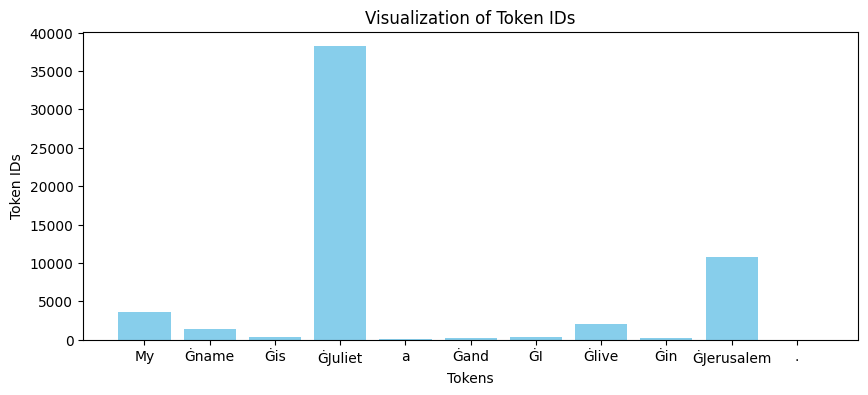

In [13]:
plt.figure(figsize=(10, 4))
plt.bar(tokens,token_ids, color="skyblue")
plt.xlabel("Tokens")
plt.ylabel("Token IDs")
plt.title("Visualization of Token IDs")
plt.show()


## Exercise 3 : Understanding Token IDs and Special Prefixes

  - Print the ID of each tokens from text
  - What does special prefixes like ‘Ġ’ indicate ?

The special prefixes indicate that the word comes after a space.

In [14]:
print(f"Token IDs: {token_ids}")

Token IDs: [3666, 1438, 318, 38201, 64, 290, 314, 2107, 287, 10843, 13]


## Exercise 4 : Pretraining vs. Fine-Tuning

Explain with your own words the two phases of Pretraining and FineTuning in Transformers.

Pretraining: the model learns general language patterns and structures from a large, diverse dataset without focusing on any specific task.

Fine-tuning: the pretrained model is adapted to perform a specific task by training it on a smaller, task-specific dataset.

## Exercise 5 : Generate Simple Text

  - Create a variable text with the sentence of your choice (another one)
  - The model generates text by predicting the next word sequentially, based on the given input text (prompt). Generate output using the model.


In [15]:
text = "My favorite cake is my grandma's honey cake."

In [17]:
input_id = tokenizer.encode(text, return_tensors="pt")

In [19]:
output_ids = model.generate(input_id, max_length=50, do_sample=True)
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print(f"Input: {text}")
print(f"Generated Output: {output_text}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Input: My favorite cake is my grandma's honey cake.
Generated Output: My favorite cake is my grandma's honey cake. Not only is it sweet and a bit sweet, but it's also buttery and sweet without being heavy. And it also won't get too expensive. I think it's quite small, but there
